# 데이터 불러오기 및 전처리

In [1]:
import pandas as pd
import numpy as np

# 데이터 전처리에 필요한 패키지 장착

In [2]:
GJ_2013=pd.read_csv("./NHIS_OPEN_GJ_2013.csv",encoding='CP949') # 데이터 불러오기
GJ_2013.head() # 데이터 일부 확인

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2013,24193,2,14,11,145,35,83,0.1,0.1,...,30,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20151220
1,2013,134496,1,1,27,140,35,68,0.8,0.8,...,12,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20151220
2,2013,978782,2,1,29,145,35,68,9.9,9.9,...,16,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20151220
3,2013,10313,2,1,43,145,40,62,1.0,1.0,...,22,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,20151220
4,2013,915645,2,1,41,145,40,64,0.8,0.7,...,12,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20151220


In [3]:
GJ_2013.shape # 데이터 차원 : 1000000 x 34

(1000000, 34)

In [4]:
GJ_2013.info() # 34개 변수 타입 : 정수형 또는 실수형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
기준년도            1000000 non-null int64
가입자일련번호         1000000 non-null int64
성별코드            1000000 non-null int64
연령대코드(5세단위)     1000000 non-null int64
시도코드            1000000 non-null int64
신장(5Cm단위)       1000000 non-null int64
체중(5Kg 단위)      1000000 non-null int64
허리둘레            1000000 non-null int64
시력(좌)           999816 non-null float64
시력(우)           999813 non-null float64
청력(좌)           999850 non-null float64
청력(우)           999848 non-null float64
수축기혈압           1000000 non-null int64
이완기혈압           1000000 non-null int64
식전혈당(공복혈당)      1000000 non-null int64
총콜레스테롤          1000000 non-null int64
트리글리세라이드        1000000 non-null int64
HDL콜레스테롤        1000000 non-null int64
LDL콜레스테롤        994616 non-null float64
혈색소             1000000 non-null float64
요단백             995629 non-null float64
혈청크레아티닌         1000000 non-null float64
(혈청지오티)AST      1000

In [5]:
GJ_2013.isna().sum()

# 결측치가 있는 변수 : 시력좌/시력우/청력좌/청력우/LDL/요단백/흡연상태/음주여부/치아우식증유무/결손치유무/치아마모증유무/사랑니이상/치석

기준년도                 0
가입자일련번호              0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레                 0
시력(좌)              184
시력(우)              187
청력(좌)              150
청력(우)              152
수축기혈압                0
이완기혈압                0
식전혈당(공복혈당)           0
총콜레스테롤               0
트리글리세라이드             0
HDL콜레스테롤             0
LDL콜레스테롤          5384
혈색소                  0
요단백               4371
혈청크레아티닌              0
(혈청지오티)AST           0
(혈청지오티)ALT           0
감마지티피                0
흡연상태                38
음주여부               176
구강검진 수검여부            0
치아우식증유무         616193
결손치유무           616193
치아마모증유무         616193
제3대구치(사랑니)이상    616193
치석              616193
데이터공개일자              0
dtype: int64

In [7]:
GJ_2013=GJ_2013.drop(['치아우식증유무','결손치유무','치아마모증유무','제3대구치(사랑니)이상','치석'],axis=1)

# 결측비율이 약 60%인 5개의 변수 제거

In [9]:
GJ_2013.shape # 5개의 변수가 제거됨

(1000000, 29)

In [10]:
GJ_2013.describe()

# 영-분산에 해당하는 변수 : 기준년도/데이터공개일자

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,데이터공개일자
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999816.000000,999813.000000,...,1000000.000000,995629.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999962.000000,999824.000000,1000000.000000,1000000.0
mean,2013.0,500000.500000,1.457679,6.272515,33.547680,162.231600,62.405025,80.376272,0.981867,0.980188,...,14.090244,1.074773,0.902297,25.219697,24.897538,36.040679,1.645470,0.487020,0.383807,20151220.0
std,0.0,288675.278933,0.498206,2.820719,12.780338,9.331409,11.937396,9.186983,0.632352,0.634163,...,1.628913,0.387370,0.685890,15.483844,21.036643,48.689250,0.847874,0.499832,0.486312,0.0
min,2013.0,1.000000,1.000000,1.000000,11.000000,120.000000,25.000000,51.000000,0.100000,0.100000,...,0.600000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20151220.0
25%,2013.0,250000.750000,1.000000,4.000000,26.000000,155.000000,55.000000,74.000000,0.700000,0.700000,...,13.000000,1.000000,0.700000,19.000000,14.000000,15.000000,1.000000,0.000000,0.000000,20151220.0
50%,2013.0,500000.500000,1.000000,6.000000,41.000000,160.000000,60.000000,80.000000,1.000000,1.000000,...,14.100000,1.000000,0.900000,22.000000,20.000000,23.000000,1.000000,0.000000,0.000000,20151220.0
75%,2013.0,750000.250000,2.000000,8.000000,44.000000,170.000000,70.000000,86.000000,1.200000,1.200000,...,15.300000,1.000000,1.000000,28.000000,28.000000,38.000000,2.000000,1.000000,1.000000,20151220.0
max,2013.0,1000000.000000,2.000000,14.000000,49.000000,190.000000,130.000000,129.000000,9.900000,9.900000,...,25.000000,6.000000,97.000000,998.000000,993.000000,999.000000,3.000000,1.000000,1.000000,20151220.0


In [11]:
GJ_2013=GJ_2013.drop(['기준년도','데이터공개일자'],axis=1)

# 영-분산을 가지는 2개의 변수를 제거

In [12]:
GJ_2013.shape # 2개의 변수가 제거됨

(1000000, 27)

In [13]:
GJ_2013

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부
0,24193,2,14,11,145,35,83,0.1,0.1,1.0,...,119.0,11.3,NaN,0.9,18,8,30,1.0,0.0,0
1,134496,1,1,27,140,35,68,0.8,0.8,1.0,...,60.0,14.4,1.0,0.7,22,14,12,1.0,0.0,0
2,978782,2,1,29,145,35,68,9.9,9.9,2.0,...,76.0,13.7,1.0,0.8,16,15,16,1.0,0.0,0
3,10313,2,1,43,145,40,62,1.0,1.0,1.0,...,110.0,12.4,1.0,0.7,14,8,22,1.0,0.0,1
4,915645,2,1,41,145,40,64,0.8,0.7,1.0,...,48.0,12.7,1.0,0.7,17,11,12,1.0,0.0,0
5,3494,2,1,11,145,45,72,0.8,0.2,1.0,...,140.0,13.1,1.0,0.8,13,12,13,1.0,1.0,1
6,188701,2,1,47,145,50,68,0.5,0.5,1.0,...,84.0,13.2,1.0,0.8,14,11,14,1.0,0.0,0
7,727679,2,1,48,145,55,80,1.0,1.0,1.0,...,104.0,12.3,1.0,0.8,13,8,10,1.0,0.0,0
8,934324,2,1,41,145,60,85,0.8,1.0,1.0,...,66.0,13.0,1.0,0.7,17,19,19,1.0,0.0,0
9,151587,2,1,43,145,60,81,0.4,0.8,1.0,...,1494.0,12.7,1.0,0.6,28,36,25,1.0,0.0,1


In [14]:
GJ_2013=GJ_2013.drop(['가입자일련번호'],axis=1)
# 편의상 가입자일련번호 변수 제거

In [15]:
GJ_2013.shape # 1개의 변수가 제거됨

(1000000, 26)

In [16]:
GJ_2013.isna().sum()

# 결측치가 있는 변수 : 시력좌/시력우/청력좌/청력우/LDL/요단백/흡연상태/음주여부

성별코드              0
연령대코드(5세단위)       0
시도코드              0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)           184
시력(우)           187
청력(좌)           150
청력(우)           152
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)        0
총콜레스테롤            0
트리글리세라이드          0
HDL콜레스테롤          0
LDL콜레스테롤       5384
혈색소               0
요단백            4371
혈청크레아티닌           0
(혈청지오티)AST        0
(혈청지오티)ALT        0
감마지티피             0
흡연상태             38
음주여부            176
구강검진 수검여부         0
dtype: int64

In [17]:
fill_mean_func = lambda g: g.fillna(g.mean())
GJ_2013=GJ_2013.groupby(['성별코드','연령대코드(5세단위)','시도코드']).apply(fill_mean_func)

# sex, age, sido 그룹별로 결측값 평균치 대체
# mean, median, mode 중 UE(비편향) 성질을 만족하는 평균값으로 대체
# 각 변수별로 이상치가 많으나, 데이터의 갯수가 충분히 확보(100만개)된 상태이므로, mean 사용
# 전반적으로 히스토그램이 우측 긴 꼬리의 형태를 나타내고 있으므로, 평균 > 중앙값 > 최빈값 순서를 따름
# https://rfriend.tistory.com/402 : 결측값을 그룹 평균값으로 채우기 (Fill missing values by Group means)
# 출처: https://rfriend.tistory.com/402 [R, Python 분석과 프로그래밍 (by R Friend)]

In [18]:
GJ_2013=GJ_2013.drop(['성별코드','연령대코드(5세단위)','시도코드'], axis=1)

In [19]:
GJ_2013.reset_index(inplace=True)

# 인덱스 초기화
# inplace=True : 객체 반환 x(결과물 안보이게 하기)
# https://nittaku.tistory.com/122

In [20]:
del GJ_2013['level_3']

# del health['변수명'] : 특정 변수 제거

In [21]:
GJ_2013.head()

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부
0,1,1,11,150,50,72,0.5,0.5,1.0,1.0,...,167.0,14.6,3.0,0.8,57,63,28,1.0,0.0,1
1,1,1,11,160,50,74,1.2,1.0,1.0,1.0,...,143.0,15.6,1.0,1.0,19,20,23,1.0,0.0,0
2,1,1,11,160,55,81,1.0,1.0,1.0,1.0,...,110.0,15.5,1.0,0.6,28,77,81,1.0,0.0,0
3,1,1,11,160,60,72,0.6,0.7,1.0,1.0,...,71.0,14.9,1.0,0.9,13,7,13,3.0,1.0,0
4,1,1,11,165,50,66,0.8,1.2,2.0,2.0,...,72.0,15.5,1.0,1.1,16,8,14,1.0,1.0,1


In [22]:
GJ_2013.shape

(1000000, 26)

In [23]:
GJ_2013.describe()

,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.457679,6.272515,33.547680,162.231600,62.405025,80.376272,0.981860,0.980182,1.027862,1.026652,...,114.352150,14.090244,1.074819,0.902297,25.219697,24.897538,36.040679,1.645461,0.487000,0.383807
std,0.498206,2.820719,12.780338,9.331409,11.937396,9.186983,0.632299,0.634108,0.164556,0.161042,...,39.069318,1.628913,0.386530,0.685890,15.483844,21.036643,48.689250,0.847865,0.499796,0.486312
min,1.000000,1.000000,11.000000,120.000000,25.000000,51.000000,0.100000,0.100000,1.000000,1.000000,...,1.000000,0.600000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,4.000000,26.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,...,91.000000,13.000000,1.000000,0.700000,19.000000,14.000000,15.000000,1.000000,0.000000,0.000000
50%,1.000000,6.000000,41.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,...,112.000000,14.100000,1.000000,0.900000,22.000000,20.000000,23.000000,1.000000,0.000000,0.000000
75%,2.000000,8.000000,44.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,...,135.000000,15.300000,1.000000,1.000000,28.000000,28.000000,38.000000,2.000000,1.000000,1.000000
max,2.000000,14.000000,49.000000,190.000000,130.000000,129.000000,9.900000,9.900000,2.000000,2.000000,...,7464.000000,25.000000,6.000000,97.000000,998.000000,993.000000,999.000000,3.000000,1.000000,1.000000


In [24]:
GJ_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
성별코드           1000000 non-null int64
연령대코드(5세단위)    1000000 non-null int64
시도코드           1000000 non-null int64
신장(5Cm단위)      1000000 non-null int64
체중(5Kg 단위)     1000000 non-null int64
허리둘레           1000000 non-null int64
시력(좌)          1000000 non-null float64
시력(우)          1000000 non-null float64
청력(좌)          1000000 non-null float64
청력(우)          1000000 non-null float64
수축기혈압          1000000 non-null int64
이완기혈압          1000000 non-null int64
식전혈당(공복혈당)     1000000 non-null int64
총콜레스테롤         1000000 non-null int64
트리글리세라이드       1000000 non-null int64
HDL콜레스테롤       1000000 non-null int64
LDL콜레스테롤       1000000 non-null float64
혈색소            1000000 non-null float64
요단백            1000000 non-null float64
혈청크레아티닌        1000000 non-null float64
(혈청지오티)AST     1000000 non-null int64
(혈청지오티)ALT     1000000 non-null int64
감마지티피          1000000 non-null int6

In [25]:
GJ_2013 = GJ_2013.rename(columns = {'성별코드' : 'sex',
                    '연령대코드(5세단위)' : 'year',
                    '시도코드' : 'sido',
                    '신장(5Cm단위)' : 'height',
                    '체중(5Kg 단위)' : 'weight',
                    '허리둘레' : 'waist',
                    '시력(좌)' : 'sight_left',
                    '시력(우)' : 'sight_right',
                    '청력(좌)' : 'hearing_left',
                    '청력(우)' : 'hearing_right',
                    '수축기혈압' : 'SBP',
                    '이완기혈압' : 'RPBP',
                    '식전혈당(공복혈당)' : 'pred_blood_sugar',
                    '총콜레스테롤' : 'cholesterol',
                    '트리글리세라이드' : 'triglycerides',
                    'HDL콜레스테롤' : 'HDL',
                    'LDL콜레스테롤' : 'LDL',
                    '혈색소' : 'blood_pigment',
                    '요단백' : 'urine_protein',
                    '혈청크레아티닌' : 'serum_creatinine',
                    '(혈청지오티)AST' : 'AST',
                    '(혈청지오티)ALT' : 'ALT',
                    '감마지티피' : 'gamma_gtp',
                    '흡연상태' : 'smoking',
                    '음주여부' : 'alcohol',
                    '구강검진 수검여부' : 'oral_inspection'})

# 시각화에서 변수명 출력을 위해 영어로 변경

In [26]:
GJ_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
sex                 1000000 non-null int64
year                1000000 non-null int64
sido                1000000 non-null int64
height              1000000 non-null int64
weight              1000000 non-null int64
waist               1000000 non-null int64
sight_left          1000000 non-null float64
sight_right         1000000 non-null float64
hearing_left        1000000 non-null float64
hearing_right       1000000 non-null float64
SBP                 1000000 non-null int64
RPBP                1000000 non-null int64
pred_blood_sugar    1000000 non-null int64
cholesterol         1000000 non-null int64
triglycerides       1000000 non-null int64
HDL                 1000000 non-null int64
LDL                 1000000 non-null float64
blood_pigment       1000000 non-null float64
urine_protein       1000000 non-null float64
serum_creatinine    1000000 non-null float64
AST         

In [27]:
import matplotlib
import matplotlib.pyplot as plt

# 데이터 탐색을 위한 시각화 패키지 장착

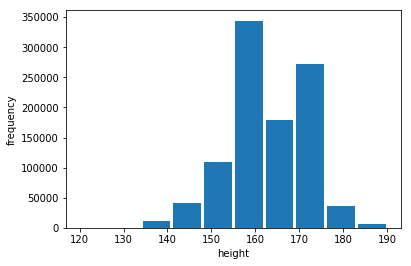

In [28]:
plt.hist(GJ_2013['height'], histtype='bar', rwidth=0.9)
plt.xlabel('height')
plt.ylabel('frequency')
plt.show()

# https://ordo.tistory.com/69

In [30]:
GJ_2013['pred_blood_sugar'] = np.where(GJ_2013['pred_blood_sugar'] >= 126, 1, 0)

# target 변수인 pred_blood_sugar가 126 이상일 때, 당뇨진단으로 판정
# 이분형 자료로 변환
# https://rfriend.tistory.com/tag/Python

In [31]:
GJ_2013['pred_blood_sugar'].value_counts()

# 당뇨진단자 비율 : 약 7%

0    934088
1     65912
Name: pred_blood_sugar, dtype: int64

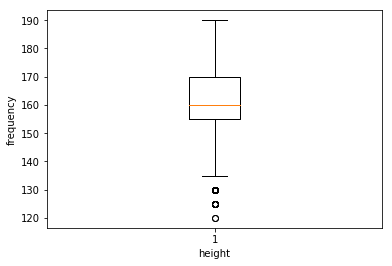

In [32]:
plt.boxplot(GJ_2013['height'])
plt.xlabel('height')
plt.ylabel('frequency')
plt.show()

연속형 변수 목록

-> 신장(5Cm단위) / 체중(5Kg단위) / 허리둘레 / 시력좌 / 시력우 / 수축기혈압 / 이완기혈압 / 식전혈당.공복혈당 / 총콜레스테롤 / 트리글리세라이드 / HDL콜레스테롤 / LDL콜레스테롤 / 혈색소 / 혈청크레아티닌 / X.혈청지오티.AST / X.혈청지오티.ALT / 감마지티피 : 연속형 변수

이산형 변수 목록

-> 성별코드 / 연령대코드 / 시도코드 / 청력좌 / 청력우 / 요단백 / 흡연상태 / 구강검진.수검여부 / 음주여부 : 이산형 변수(성별코드,연령대코드,시도코드,요단백,흡연상태 : 다범주, 나머지 변수 : 이분형)

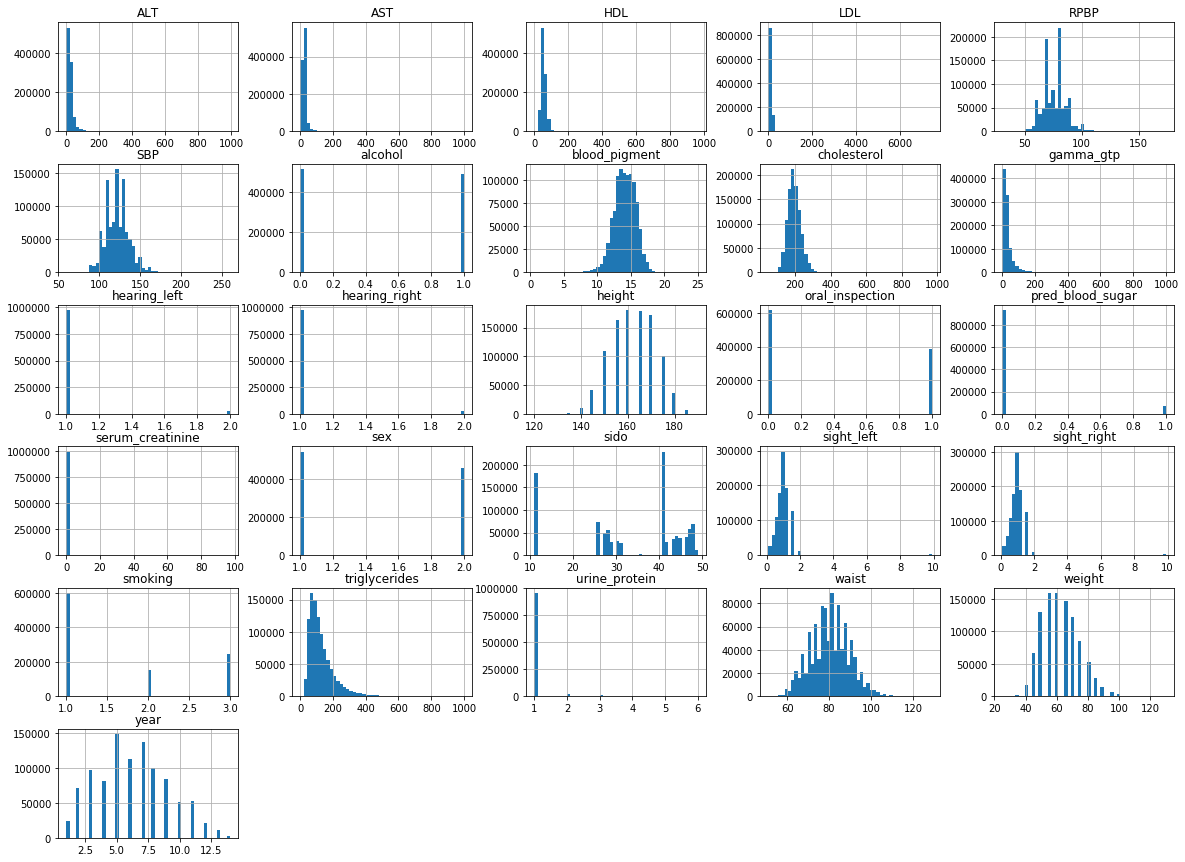

In [33]:
GJ_2013.hist(bins=50, figsize=(20,15))
plt.show()



# ALT / AST / HDL / LDL / RPBP / SBP / cholesterol / gamma_gtp / height / serum_creatinine / sight_left / sight_right -> skwed distribution
# triglycerides / urine_protein / waist / weight -> skwed distribution
# blood_pigment -> normal distribution
# alcohol / oral_inspection -> 이산형, 비교적 고른 분포
# hearing_left / hearing_right / smoking / pred_blood_sugar -> class unbalance
# sex / year / sido -> groupby 기준변수

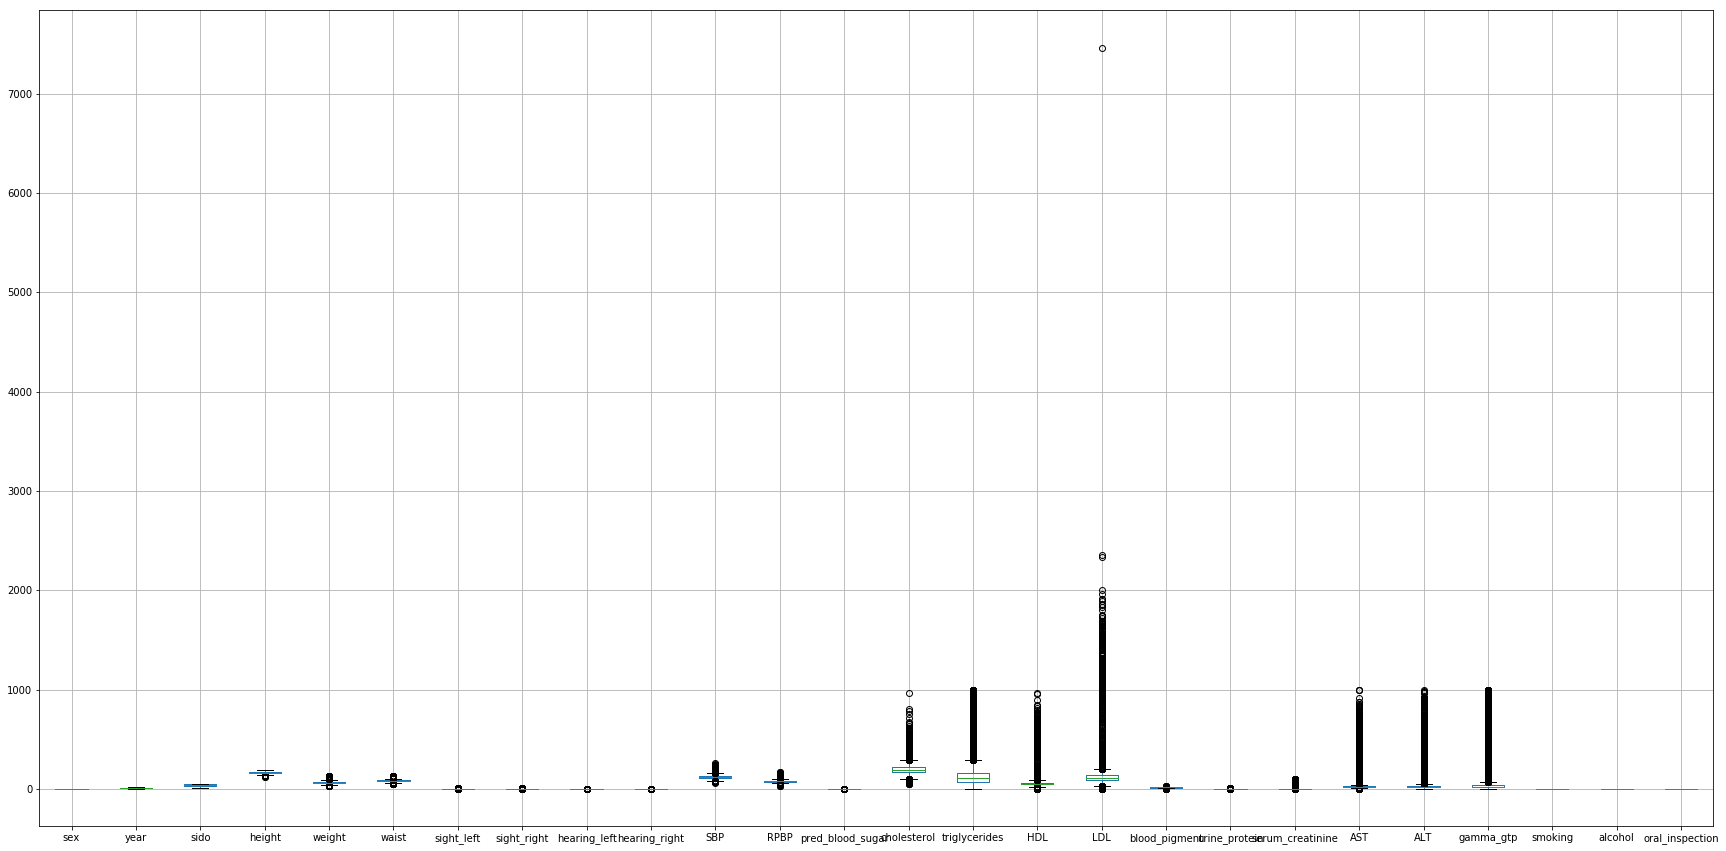

In [34]:
GJ_2013.boxplot(figsize=(30,15))
plt.show()

# 이상치 처리
일반적으로 1) 표준점수로 변환 후 -3 이하 및 +3 제거 2) IQR 방식 3) 도메인 지식 이용하거나 Binning 처리하는 방식이 이용된다.

표준점수 이용할 경우 평균이 0, 표준편차가 1인 분포로 변환한후 +3 이상이거나 -3 이하인 경우 극단치로 처리한다.

IQR 방식은 75% percentile * 1.5 이상이거나 25 percentile* 1.5 이하인 경우 극단치로 처리하는 방식이다.
이해하기 쉽고 적용하기 쉬운 편이지만, 경우에 따라 너무 많은 사례들이 극단치로 고려되는 경우가 있다.

https://wikidocs.net/16582

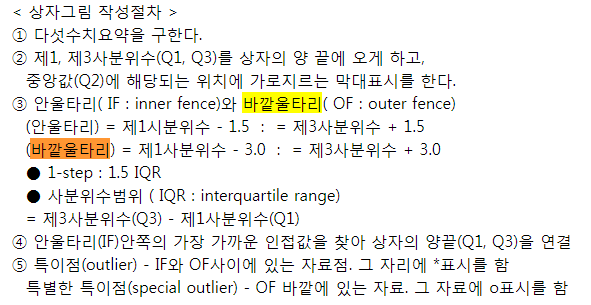

연속형 변수 목록

-> 신장(5Cm단위) / 체중(5Kg단위) / 허리둘레 / 시력좌 / 시력우 / 수축기혈압 / 이완기혈압 / 식전혈당.공복혈당 / 총콜레스테롤 / 트리글리세라이드 / HDL콜레스테롤 / LDL콜레스테롤 / 혈색소 / 혈청크레아티닌 / X.혈청지오티.AST / X.혈청지오티.ALT / 감마지티피 : 연속형 변수

이산형 변수 목록

-> 성별코드 / 연령대코드 / 시도코드 / 청력좌 / 청력우 / 요단백 / 흡연상태 / 구강검진.수검여부 / 음주여부 : 이산형 변수(성별코드,연령대코드,시도코드,요단백,흡연상태 : 다범주, 나머지 변수 : 이분형)

In [35]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3)
    upper_bound = quartile_3 + (iqr * 3)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [36]:
print(np.array(outliers_iqr(GJ_2013['height'])).shape[1],
      np.array(outliers_iqr(GJ_2013['weight'])).shape[1],
      np.array(outliers_iqr(GJ_2013['waist'])).shape[1],
      np.array(outliers_iqr(GJ_2013['sight_left'])).shape[1],
      np.array(outliers_iqr(GJ_2013['sight_right'])).shape[1],
      np.array(outliers_iqr(GJ_2013['SBP'])).shape[1],
      np.array(outliers_iqr(GJ_2013['RPBP'])).shape[1],
      np.array(outliers_iqr(GJ_2013['pred_blood_sugar'])).shape[1],
      np.array(outliers_iqr(GJ_2013['cholesterol'])).shape[1],
      np.array(outliers_iqr(GJ_2013['triglycerides'])).shape[1],
      np.array(outliers_iqr(GJ_2013['HDL'])).shape[1],
      np.array(outliers_iqr(GJ_2013['LDL'])).shape[1],
      np.array(outliers_iqr(GJ_2013['blood_pigment'])).shape[1],
      np.array(outliers_iqr(GJ_2013['serum_creatinine'])).shape[1],
      np.array(outliers_iqr(GJ_2013['AST'])).shape[1],
      np.array(outliers_iqr(GJ_2013['ALT'])).shape[1],
      np.array(outliers_iqr(GJ_2013['gamma_gtp'])).shape[1])

# Outer fence(바깥 울타리) 기준 심각한 이상치는 최소 9개를 가진 변수(height)부터 최대 44312개를 가진 변수(gamma_gtp)까지 있음
# gamma_gtp 변수의 OF 기준 이상치 제거할 경우, 데이터 손실율 약 4.4%
# 특정 연령, 성별, 시/도에 해당하는 범주의 경우, 이상치 비율이 많을 경우 문제 발생
# 이상치 제거 방법으로 IQR 정보를 이용하는 것이 바람직하지 않을 수 있음

0 109 42 3453 3501 405 1852 65912 490 16413 1189 750 197 3503 23543 27216 45113


데이터 단위 변환
데이터의 스케일(측정단위)이 다를 경우 특히 거리를 기반으로 분류하는 모델(KNN 등)에 부정적인 영향을 미치므로, 스케일링을 통해 단위를 일정하게 맞추는 작업을 진행해야 한다. 아래 방식이 주로 스케일링을 위해 쓰이는 방법이다. 대부분의 통계 분석 방법이 정규성 가정을 기반으로 하므로 완벽하지 않더라도 최대한 정규분포로 변환하는 노력이 필요하다.

Scaling: 평균이 0, 분산이 1인 분포로 변환
MinMax Scaling: 특정 범위 (예, 0~1)로 모든 데이터를 변환
Box-Cox: 여러 k 값중 가장 작은 SSE 선택
Robust_scale: median, interquartile range 사용(outlier 영향 최소화)

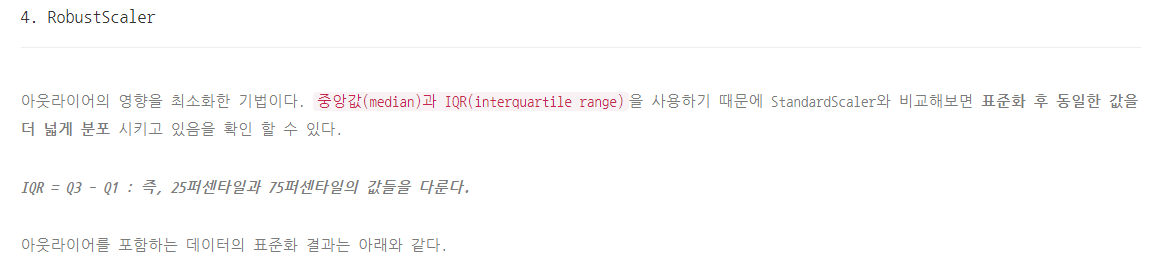

In [37]:
from sklearn.ensemble import IsolationForest

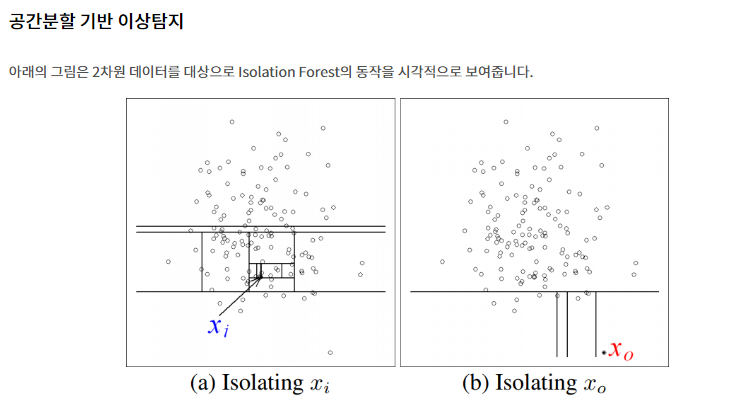

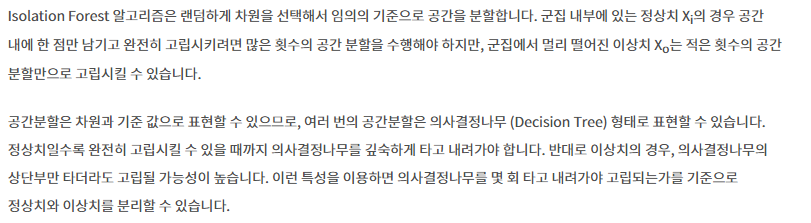

http://ko.logpresso.com/documents/anomaly-detection

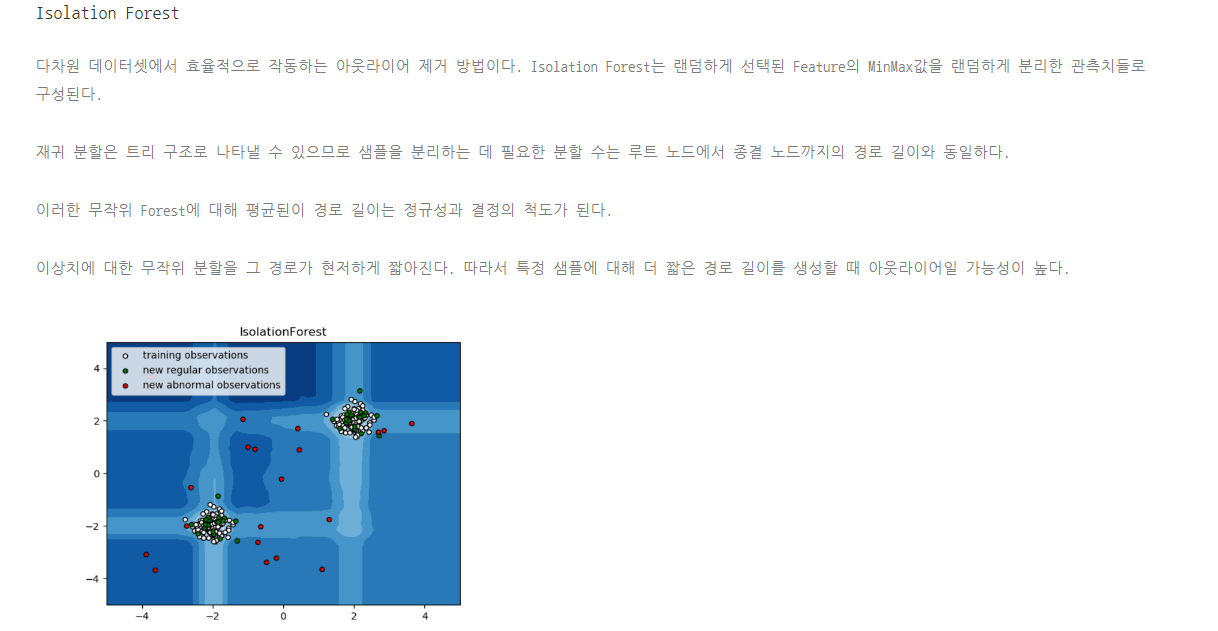

In [38]:
clf = IsolationForest(max_samples=1000, random_state=1, contamination=0.01, max_features=2)
# Isolation Forest 방법을 사용하기 위해, 변수로 선언을 해 준다.
# n_estimators=100 : 학습모형 100개
# max_samples=100 : 모형 당 최대 아웃라이어 갯수 1000개
# contamination='legacy' : 아웃라이어 비율 : 0.01(10000개)
# max_features=2 : 각 학습모형이 2개의 변수로 학습됨
# bootstrap=False : 각 학습모형이 샘플을 비복원 추출함
clf.fit(GJ_2013)
# fit 함수를 이용하여, 데이터셋을 학습
y_pred_outliers = clf.predict(GJ_2013)
# predict 함수를 이용하여, outlier를 판별. 0과 1로 이루어진 Series형태의 데이터가 나옴

out = pd.DataFrame(y_pred_outliers)
out = out.rename(columns={0: "out"})
GJ_2013 = pd.concat([GJ_2013, out], 1)
# 원래의 dataframe에 붙이기. 데이터가 0인 것이 outlier이기 때문에, 0인 것을 제거하면 outlier가 제거된 dataframe을 얻을 수 있음

# https://mkjjo.github.io/python/2019/01/10/outlier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

C:\Users\HanJeongWook\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\HanJeongWook\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [39]:
GJ_2013['out'].value_counts()

# 10000개의 이상치를 detecting(label : -1)

 1    990000
-1     10000
Name: out, dtype: int64

In [40]:
GJ_2013=GJ_2013[GJ_2013['out']==1]

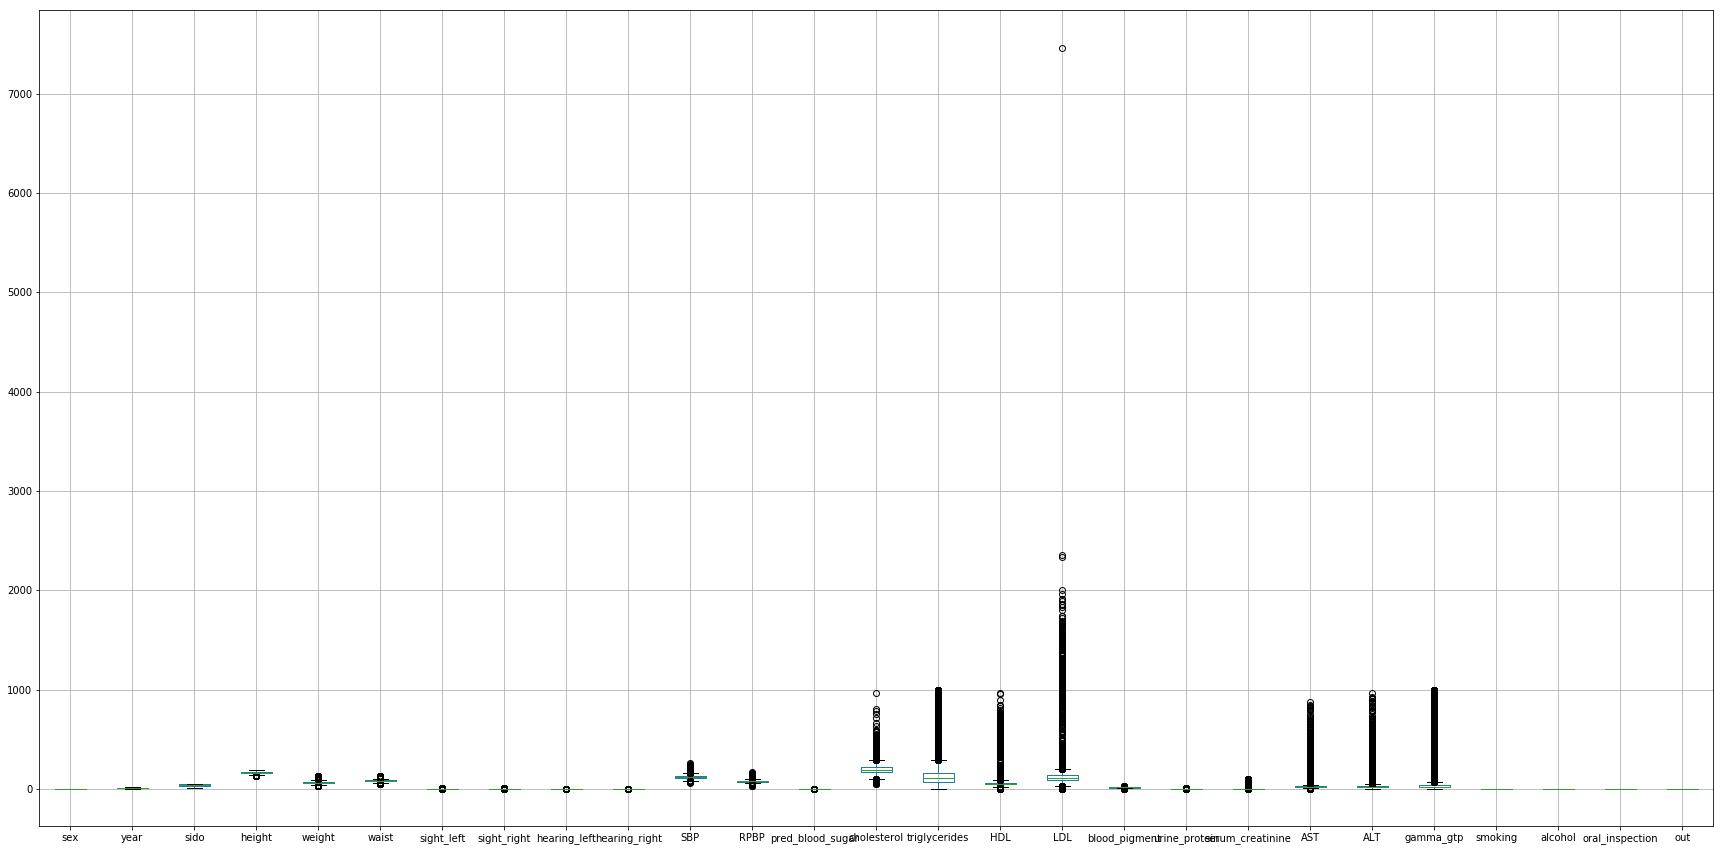

In [41]:
GJ_2013.boxplot(figsize=(30,15))
plt.show()

In [42]:
GJ_2013=GJ_2013[GJ_2013['LDL']<3000]

# Box-plot에서 불연속이면서 많은 값의 차이를 보이는 이상치 제거

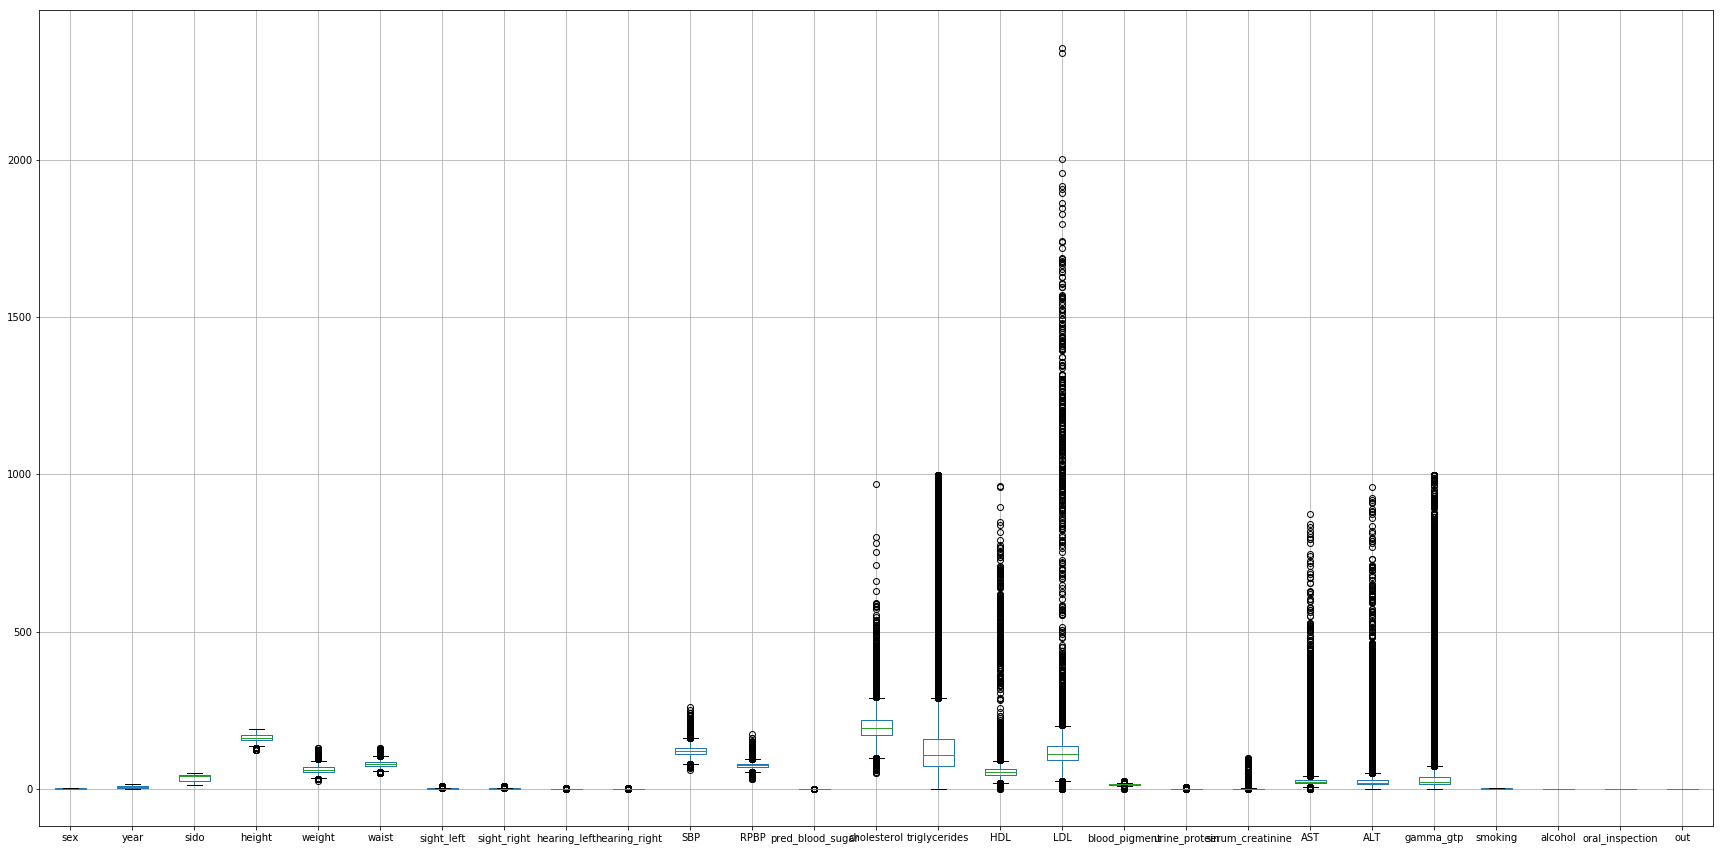

In [43]:
GJ_2013.boxplot(figsize=(30,15))
plt.show()

# 불연속으로 많이 떨어진 이상치 제거

In [44]:
del GJ_2013['out']

In [45]:
GJ_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989999 entries, 1 to 999996
Data columns (total 26 columns):
sex                 989999 non-null int64
year                989999 non-null int64
sido                989999 non-null int64
height              989999 non-null int64
weight              989999 non-null int64
waist               989999 non-null int64
sight_left          989999 non-null float64
sight_right         989999 non-null float64
hearing_left        989999 non-null float64
hearing_right       989999 non-null float64
SBP                 989999 non-null int64
RPBP                989999 non-null int64
pred_blood_sugar    989999 non-null int32
cholesterol         989999 non-null int64
triglycerides       989999 non-null int64
HDL                 989999 non-null int64
LDL                 989999 non-null float64
blood_pigment       989999 non-null float64
urine_protein       989999 non-null float64
serum_creatinine    989999 non-null float64
AST                 989999 non-nu

In [47]:
GJ_2013 = GJ_2013.rename(columns = {'height' : 'height_2013',
                    'weight' : 'weight_2013',
                    'waist' : 'waist_2013',
                    'sight_left' : 'sight_left_2013',
                    'sight_right' : 'sight_right_2013',
                    'hearing_left' : 'hearing_left_2013',
                    'hearing_right' : 'hearing_right_2013',
                    'SBP' : 'SBP_2013',
                    'RPBP' : 'RPBP_2013',
                    'cholesterol' : 'cholesterol_2013',
                    'triglycerides' : 'triglycerides_2013',
                    'HDL' : 'HDL_2013',
                    'LDL' : 'LDL_2013',
                    'blood_pigment' : 'blood_pigment_2013',
                    'urine_protein' : 'urine_protein_2013',
                    'serum_creatinine' : 'serum_creatinine_2013',
                    'AST' : 'AST_2013',
                    'ALT' : 'ALT_2013',
                    'gamma_gtp' : 'gamma_gtp_2013',
                    'smoking' : 'smoking_2013',
                    'alcohol' : 'alcohol_2013',
                    'oral_inspection' : 'oral_inspection_2013'})

# 2013년도 건강검진정보 예측변수(22개) rename

In [48]:
GJ_2013['target'] = GJ_2013['pred_blood_sugar']

In [49]:
del GJ_2013['pred_blood_sugar']

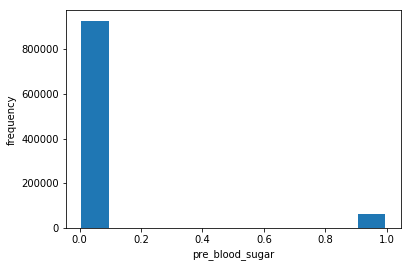

In [50]:
plt.hist(GJ_2013['target'], histtype='bar', rwidth=0.9)
plt.xlabel('pre_blood_sugar')
plt.ylabel('frequency')
plt.show()

# https://ordo.tistory.com/69

In [51]:
GJ_2013_group = GJ_2013.groupby(['sex','year','sido']).mean()

# 시/도 그룹별 평균치를 저장

In [52]:
GJ_2013_group.reset_index(inplace=True)

In [53]:
GJ_2013_group

# 476개 범주를 가지는 자료형태로 변환
# dimension : 476x26

,sex,year,sido,height_2013,weight_2013,waist_2013,sight_left_2013,sight_right_2013,hearing_left_2013,hearing_right_2013,...,blood_pigment_2013,urine_protein_2013,serum_creatinine_2013,AST_2013,ALT_2013,gamma_gtp_2013,smoking_2013,alcohol_2013,oral_inspection_2013,target
0,1,1,11,172.064516,68.267281,78.667281,1.090046,1.059263,1.002765,1.006452,...,15.506912,1.055457,0.991982,22.895853,22.081106,24.389862,1.995392,0.714286,0.593548,0.009217
1,1,1,26,171.547434,67.682737,78.311042,1.080715,1.086625,1.000000,1.001555,...,15.386625,1.026439,0.954121,23.073095,21.609642,23.637636,2.152411,0.676516,0.559876,0.012442
2,1,1,27,170.985915,68.318662,79.369718,1.095070,1.104754,1.001761,1.003521,...,15.404225,1.049296,0.961092,22.500000,23.410211,25.095070,2.093310,0.698944,0.501761,0.012324
3,1,1,28,170.957602,66.980994,77.627193,1.118421,1.103368,1.007310,1.005848,...,15.498830,1.039474,1.005263,22.786550,22.197368,25.704678,2.134503,0.704678,0.668129,0.004386
4,1,1,29,170.814394,66.875000,77.909091,1.164773,1.149621,1.000000,1.000000,...,15.479545,1.015152,0.975758,23.625000,22.715909,26.416667,2.079545,0.708333,0.625000,0.015152
5,1,1,30,172.060703,68.130990,78.319489,1.100000,1.141534,1.006390,1.003195,...,15.408946,1.022364,0.974760,22.849840,22.086262,24.338658,2.057508,0.757188,0.667732,0.015974
6,1,1,31,171.882530,68.087349,78.798193,1.075000,1.056928,1.003012,1.006024,...,15.264157,1.045181,0.972590,22.524096,21.382530,23.015060,2.192771,0.746988,0.623494,0.000000
7,1,1,36,168.400000,64.200000,78.440000,1.100000,1.108000,1.000000,1.000000,...,15.492000,1.000000,0.984000,23.840000,23.280000,24.560000,2.000000,0.560000,0.600000,0.000000
8,1,1,41,171.011173,66.797020,77.737058,1.131197,1.126389,1.003353,1.003353,...,15.495940,1.037659,0.986778,23.299814,22.987709,25.646182,2.042458,0.677467,0.595158,0.005959
9,1,1,42,171.975655,69.915730,79.509363,1.146816,1.132397,1.001873,1.000000,...,15.586704,1.022472,0.980712,23.528090,23.046816,25.217228,2.230337,0.681648,0.719101,0.005618


In [54]:
GJ_2013_group.to_csv("GJ_2013_group.csv")

# 2013년 건강검진정보 데이터전처리 -> 476개 범주화된 자료를 csv로 저장
# https://tariat.tistory.com/583

In [ ]:
# 척도화
# https://mkjjo.github.io/python/2019/01/10/scaler.html

# 데이터 분할
# https://pythonanalysis.tistory.com/7

# 데이터 분포 변환
# https://wikidocs.net/16582